# HELP International
                     -- Analysis on countries which are in direst need of aid.

In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',500)
%matplotlib inline

In [40]:
# Reading the dataset:
df=pd.read_csv("C:/Users/sougata chowdhury/OneDrive/Desktop/data science/DS/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [41]:
# Inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [42]:
# Checking if data has missing values
df.isnull().sum()

#data does not have any null value

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [43]:
#Changing the value of "exports", 'health' and 'imports' column from percentage to actual value.

df['exports']=(df['exports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']
df['imports']=(df['imports']/100)*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [44]:
# Statistical summary:

df.describe(include="all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Kuwait,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


# Univariate Analysis

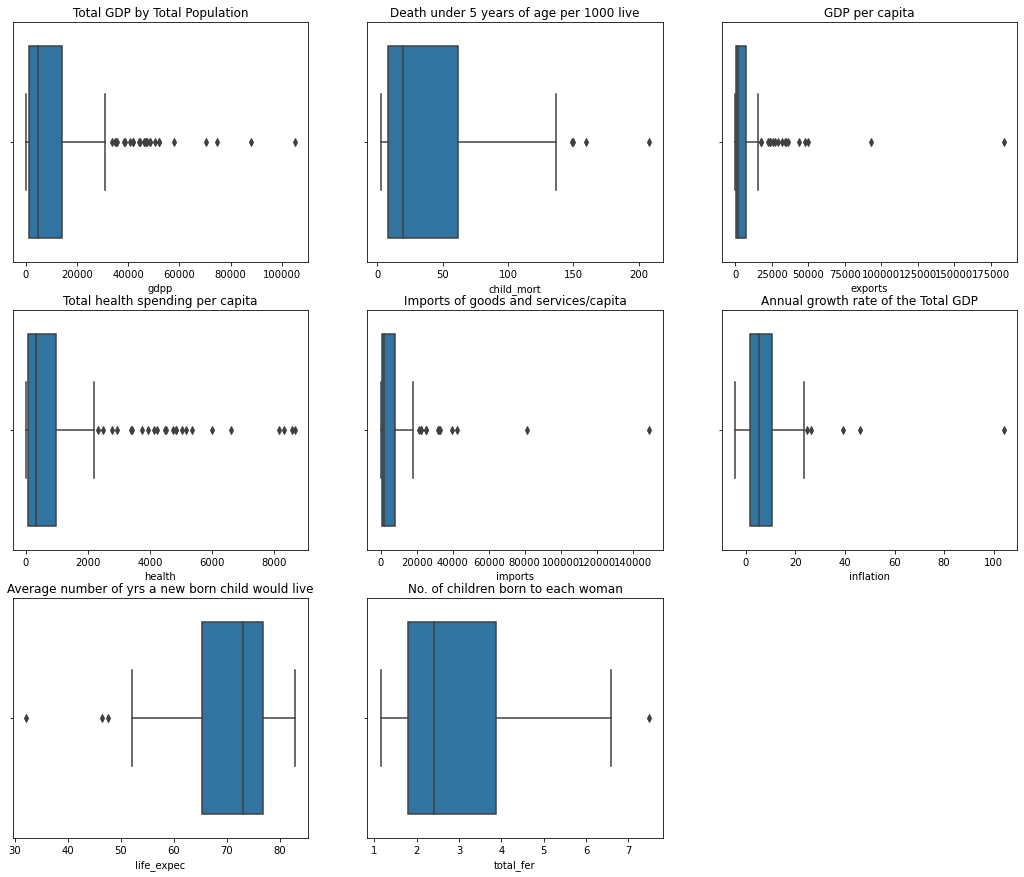

In [45]:
# checking for outliers

plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.title("Total GDP by Total Population")
sns.boxplot(x=df['gdpp'])

plt.subplot(3,3,2)
plt.title("Death under 5 years of age per 1000 live")
sns.boxplot(x=df['child_mort'])

plt.subplot(3,3,3)
plt.title("GDP per capita")
sns.boxplot(x=df['exports'])

plt.subplot(3,3,4)
plt.title("Total health spending per capita")
sns.boxplot(x=df['health'])

plt.subplot(3,3,5)
plt.title("Imports of goods and services/capita")
sns.boxplot(x=df['imports'])

plt.subplot(3,3,6)
plt.title("Annual growth rate of the Total GDP")
sns.boxplot(x=df['inflation'])

plt.subplot(3,3,7)
plt.title("Average number of yrs a new born child would live")
sns.boxplot(x=df['life_expec'])

plt.subplot(3,3,8)
plt.title("No. of children born to each woman")
sns.boxplot(x=df['total_fer'])

plt.show()


Analysis from the boxplot:
-> We can see the presence of outliers in all cases

-> Mostly number of years a new born child would live is between 65 years to 75 years

-> Mostly the number of children born to each woman ranges from 2 to 4

In [46]:
# Handling outliers present in all variables:

print (df['child_mort'].quantile([.90,.95,.96,.97,.98,.99,1]))
df.loc[df.child_mort>df.child_mort.quantile(.98),"child_mort"]=df.child_mort.quantile(.98)

print (df['health'].quantile([.90,.95,.98,.99,1]))
df.loc[df.health>df.health.quantile(.99),"health"]=df.health.quantile(.99)

print (df['exports'].quantile([.90,.95,.96,.97,.98,.99,1]))
df.loc[df.exports>df.exports.quantile(.97),"exports"]=df.exports.quantile(.97)

print (df['imports'].quantile([.90,.95,.96,.97,.98,.99,1]))
df.loc[df.imports>df.imports.quantile(.98),"imports"]=df.imports.quantile(.98)

print (df['inflation'].quantile([.75,.90,.95,.98,.99,1]))
df.loc[df.inflation>df.inflation.quantile(.98),"inflation"]=df.inflation.quantile(.98)

print (df['total_fer'].quantile([.75,.90,.95,.98,.99,1]))
df.loc[df.total_fer>df.total_fer.quantile(.98),"total_fer"]=df.total_fer.quantile(.98)

0.90    100.22
0.95    116.00
0.96    120.44
0.97    130.14
0.98    145.16
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64
0.90    3825.4160
0.95    4966.7010
0.98    7663.6200
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64
0.90     17760.600
0.95     31385.100
0.96     34258.200
0.97     36367.618
0.98     46480.928
0.99     64794.260
1.00    183750.000
Name: exports, dtype: float64
0.90     15034.280
0.95     24241.560
0.96     27701.008
0.97     32507.456
0.98     37651.400
0.99     55371.390
1.00    149100.000
Name: imports, dtype: float64
0.75     10.750
0.90     16.640
0.95     20.870
0.98     25.988
0.99     41.478
1.00    104.000
Name: inflation, dtype: float64
0.75    3.8800
0.90    5.3220
0.95    5.8610
0.98    6.4504
0.99    6.5636
1.00    7.4900
Name: total_fer, dtype: float64


# Histogram:

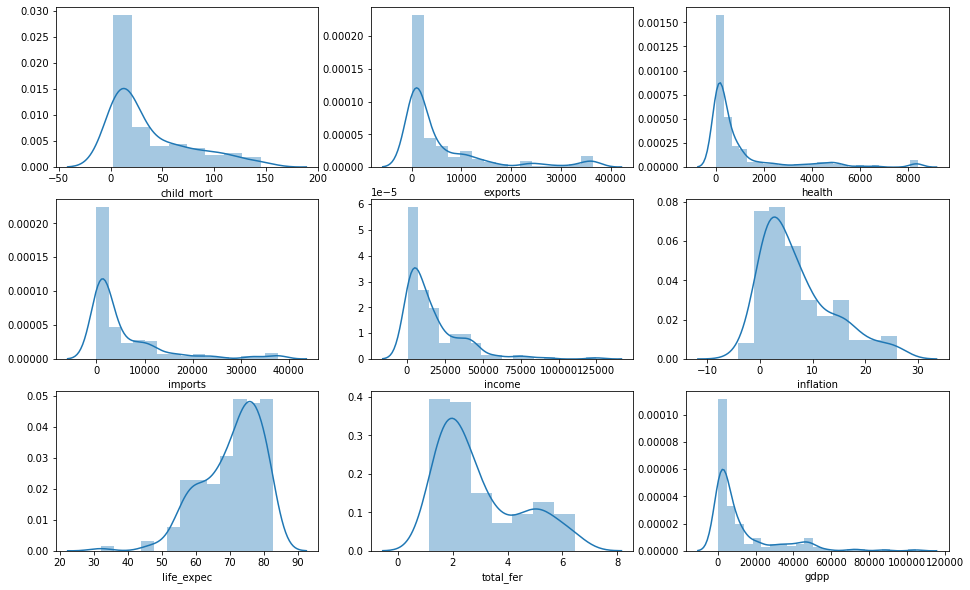

In [47]:
# Plotting histogram for better understanding of the data:

var=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(16,10))
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

Here we can see that column "total_fer", "gdpp" and "income" are not normally distributed and hence important in analysis of clustering


# Bivariate Analysis:

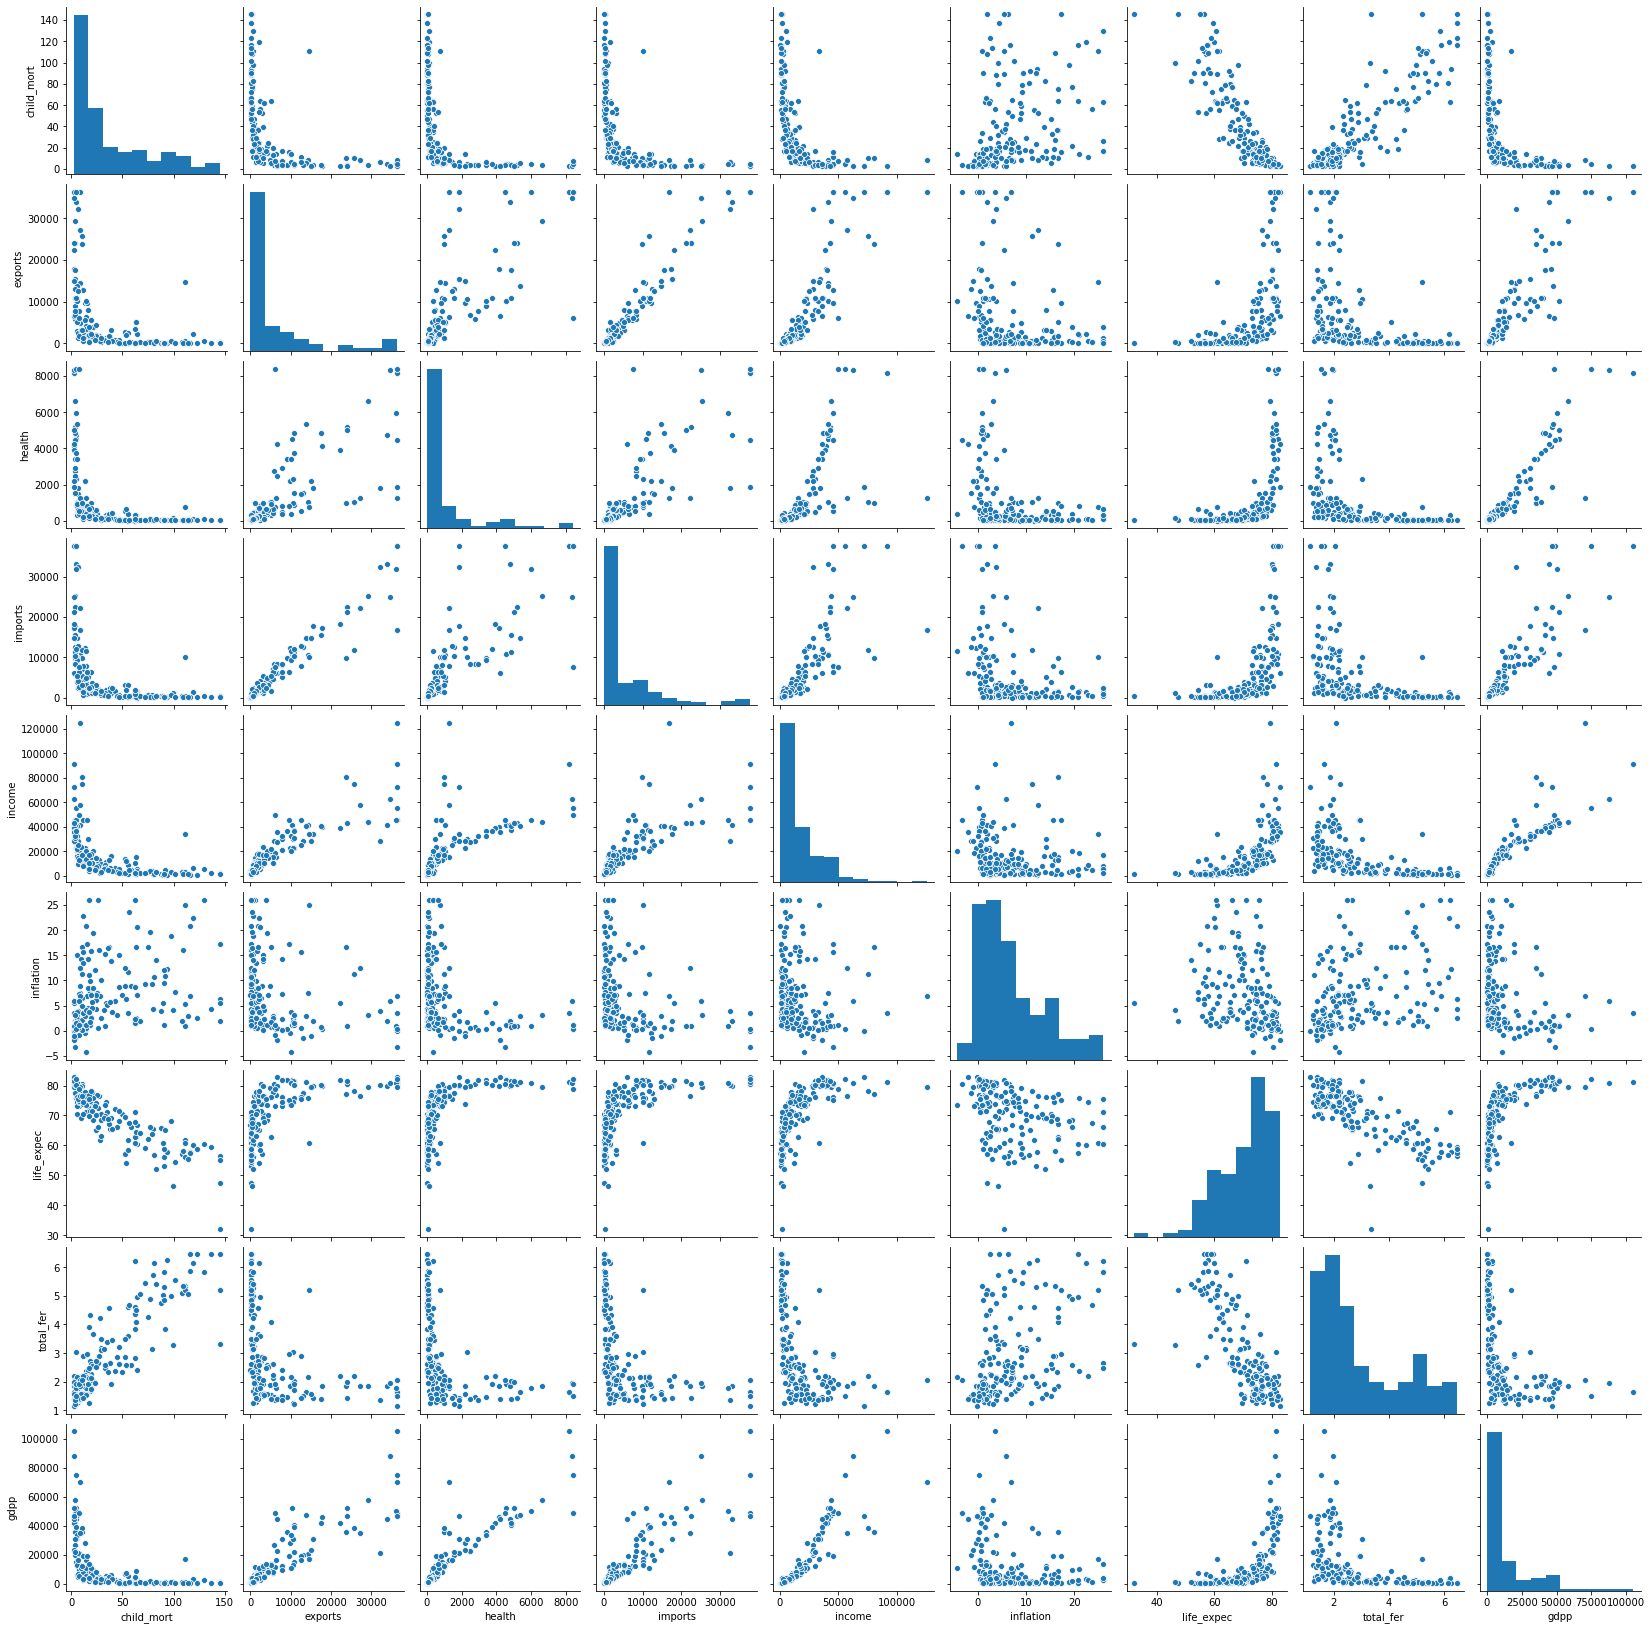

In [48]:
sns.pairplot(df[var])
plt.show()

# Multivariate Analysis:

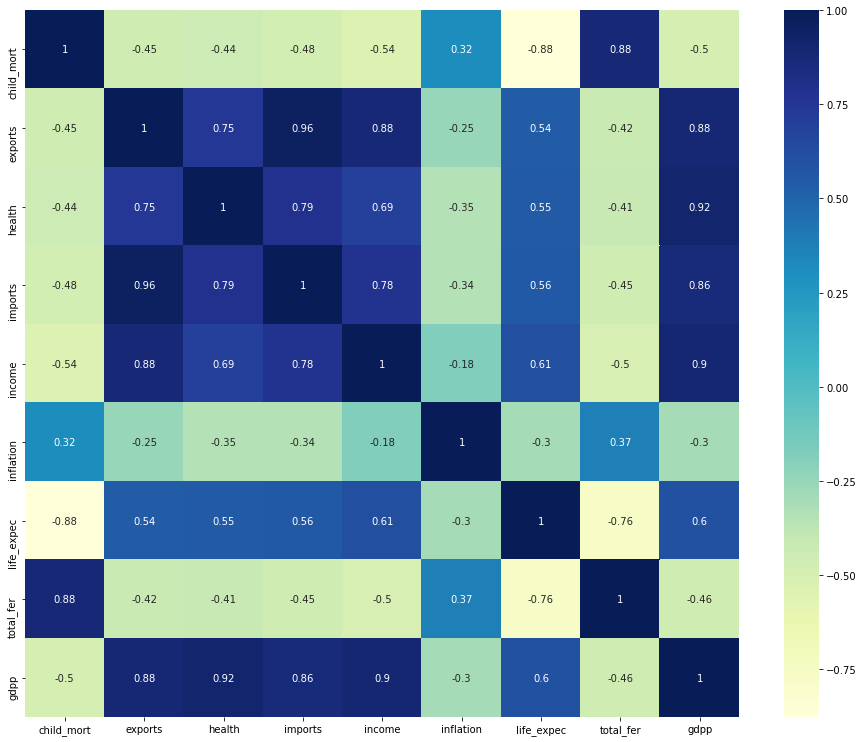

In [49]:
plt.figure(figsize=(16,13))
sns.heatmap(df[var].corr(),annot=True,cmap="YlGnBu")    
plt.show()

We can see there is high correlation among exports, health, imports, gddp, income

# Data Preparation

In [50]:
# importing libraries for Standardizing the data

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scale= StandardScaler()

In [51]:
# Removing ID column ie "country" here and doing analysis on continuous data:

df1=df.copy()

df.drop('country',axis=1,inplace=True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [52]:
# Scaling the data:

df2=scale.fit_transform(df)
df2

array([[ 1.36298718, -0.64369554, -0.56695778, ..., -1.61909203,
         1.93576673, -0.67917961],
       [-0.54971956, -0.52573158, -0.4403934 , ...,  0.64786643,
        -0.86683842, -0.48562324],
       [-0.27164942, -0.46431542, -0.48627082, ...,  0.67042323,
        -0.03344984, -0.46537561],
       ...,
       [-0.37560088, -0.54759479, -0.54024972, ...,  0.28695762,
        -0.66521215, -0.63775406],
       [ 0.48199861, -0.607145  , -0.55242911, ..., -0.34463279,
         1.16286603, -0.63775406],
       [ 1.17847335, -0.59121299, -0.54227159, ..., -2.09278484,
         1.65348995, -0.62954556]])

In [53]:
# Assigning names to the columns

df2=pd.DataFrame(df2)

df2.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.362987,-0.643696,-0.566958,-0.650202,-0.808245,0.341512,-1.619092,1.935767,-0.679180
1,-0.549720,-0.525732,-0.440393,-0.439715,-0.375369,-0.385041,0.647866,-0.866838,-0.485623
2,-0.271649,-0.464315,-0.486271,-0.510783,-0.220844,1.319056,0.670423,-0.033450,-0.465376
3,2.111438,-0.411654,-0.534088,-0.496997,-0.585043,2.243760,-1.179234,2.164277,-0.516268
4,-0.713443,-0.048875,-0.178410,0.189295,0.101732,-0.832715,0.704258,-0.544236,-0.041817


In [54]:
#Using  Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [55]:
hopkins(df2)

0.9080024054006222

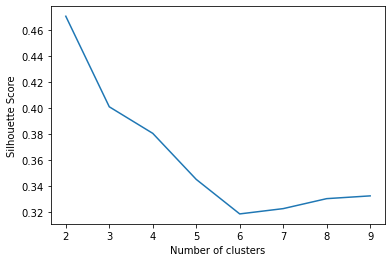

In [56]:
# Choosing the value of K by Silhouette and Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmeans.labels_)])
    
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

In [57]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4709172822177844
For n_clusters=3, the silhouette score is 0.3986499728284274
For n_clusters=4, the silhouette score is 0.3766880256213754
For n_clusters=5, the silhouette score is 0.3187172454132508
For n_clusters=6, the silhouette score is 0.2955165513534022
For n_clusters=7, the silhouette score is 0.3358358944494184
For n_clusters=8, the silhouette score is 0.29992437292046703


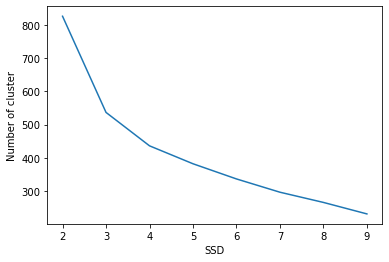

In [58]:
# SSD

ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(df2)
    ssd.append([k, model.inertia_])
plt.ylabel("Number of cluster")
plt.xlabel("SSD")    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

We can see number of cluster should be :3

In [59]:
# Kmean with 3

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df2)

KMeans(n_clusters=3, random_state=50)

In [60]:

df_km = pd.concat([df2, pd.Series(kmean.labels_)], axis =1)
df_km['country']=df1['country']
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,country
0,1.362987,-0.643696,-0.566958,-0.650202,-0.808245,0.341512,-1.619092,1.935767,-0.679180,0,Afghanistan
1,-0.549720,-0.525732,-0.440393,-0.439715,-0.375369,-0.385041,0.647866,-0.866838,-0.485623,1,Albania
2,-0.271649,-0.464315,-0.486271,-0.510783,-0.220844,1.319056,0.670423,-0.033450,-0.465376,1,Algeria
3,2.111438,-0.411654,-0.534088,-0.496997,-0.585043,2.243760,-1.179234,2.164277,-0.516268,0,Angola
4,-0.713443,-0.048875,-0.178410,0.189295,0.101732,-0.832715,0.704258,-0.544236,-0.041817,1,Antigua and Barbuda


# Cluster Profiling

In [61]:
# Finding countries that need aid based on "gdpp", "child_mort", 'income'
df_km.columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',"clus_label",'country']

df_km.clus_label.value_counts()

1    90
0    48
2    29
Name: clus_label, dtype: int64

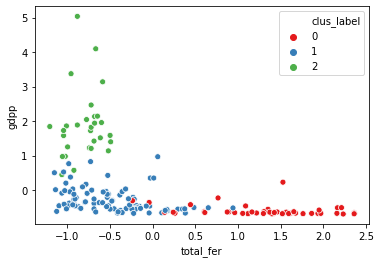

In [62]:
# Visualizing the clustering based on Total fertility:

sns.scatterplot(x='total_fer',y='gdpp',hue = 'clus_label', data = df_km, palette = "Set1")

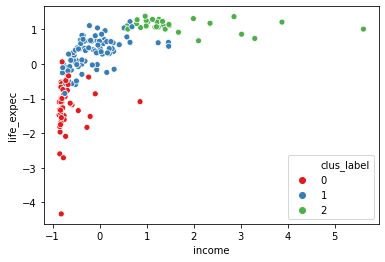

In [63]:
# Visualizing the clustering based on life expectancy:

sns.scatterplot(x='income',y='life_expec',hue ='clus_label', data=df_km, palette ="Set1")

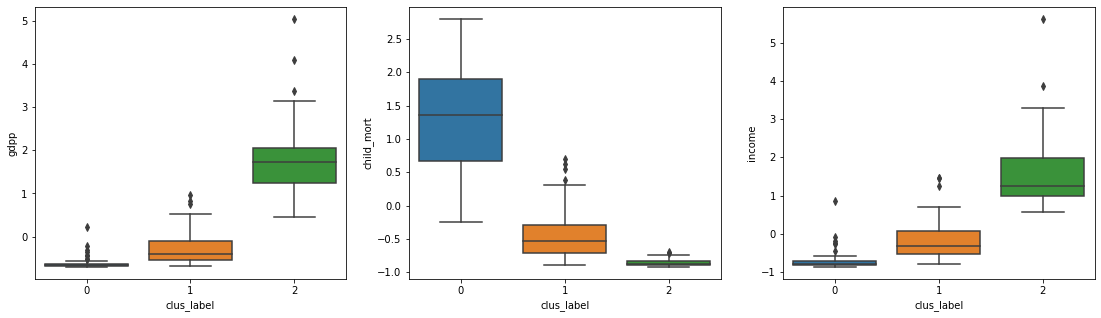

In [64]:
# Visualizing the clusters based on "gdpp", 'child mortality rate' and "income":

plt.figure(figsize=(19,5))

plt.subplot(1,3,1)
sns.boxplot(y ="gdpp", x = "clus_label", data = df_km)

plt.subplot(1,3,2)
sns.boxplot(y ="child_mort", x = "clus_label", data = df_km)

plt.subplot(1,3,3)
sns.boxplot(y ="income", x = "clus_label", data = df_km)

plt.show()

Here we can clearly see, for cluster label =0, gdpp and income is lowest, whereas child mortality rate is highest. This is what we need. Because these are the countries who are most in need of aid.


In [65]:
df_km.loc[df_km['clus_label']==0].sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clus_label,country
26,1.451346,-0.647451,-0.575427,-0.669291,-0.852261,0.761298,-1.449916,2.231485,-0.696801,0,Burundi
88,1.339598,-0.642921,-0.568824,-0.643607,-0.855591,-0.241198,-1.100286,1.398097,-0.691547,0,Liberia
37,2.033474,-0.634823,-0.575638,-0.660202,-0.860326,2.008914,-1.472473,2.359451,-0.691164,0,"Congo, Dem. Rep."
112,2.215389,-0.641319,-0.580378,-0.659572,-0.849660,-0.669791,-1.325854,2.359451,-0.690398,0,Niger
132,2.791280,-0.642426,-0.561160,-0.663591,-0.828536,1.480512,-1.754433,1.519072,-0.687607,0,Sierra Leone
93,0.635327,-0.638506,-0.581714,-0.658759,-0.819692,0.246106,-1.100286,1.115820,-0.686841,0,Madagascar
106,1.643656,-0.635396,-0.578208,-0.656824,-0.844249,0.077311,-1.810825,1.761024,-0.686513,0,Mozambique
31,2.791280,-0.643985,-0.580493,-0.665946,-0.845810,-0.749051,-2.600313,1.525793,-0.685035,0,Central African Republic
94,1.370784,-0.638354,-0.573493,-0.660864,-0.838422,0.731942,-1.968722,1.593002,-0.684324,0,Malawi
50,0.453412,-0.647182,-0.583254,-0.666658,-0.818131,0.658553,-0.998780,1.122541,-0.683065,0,Eritrea


# Conclusion: 
## Top Ten countries, which need the help most are (by KMeans method):

1- Burundi

2- Liberia

3- Congo, Dem. Rep.

4- Niger

5- Sierra Leone

6- Madagascar

7- Mozambique

8- Central African Republic

9- Malawi

10- Eritrea

# Hierarchical Clustering
Single Linkage:

In [66]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

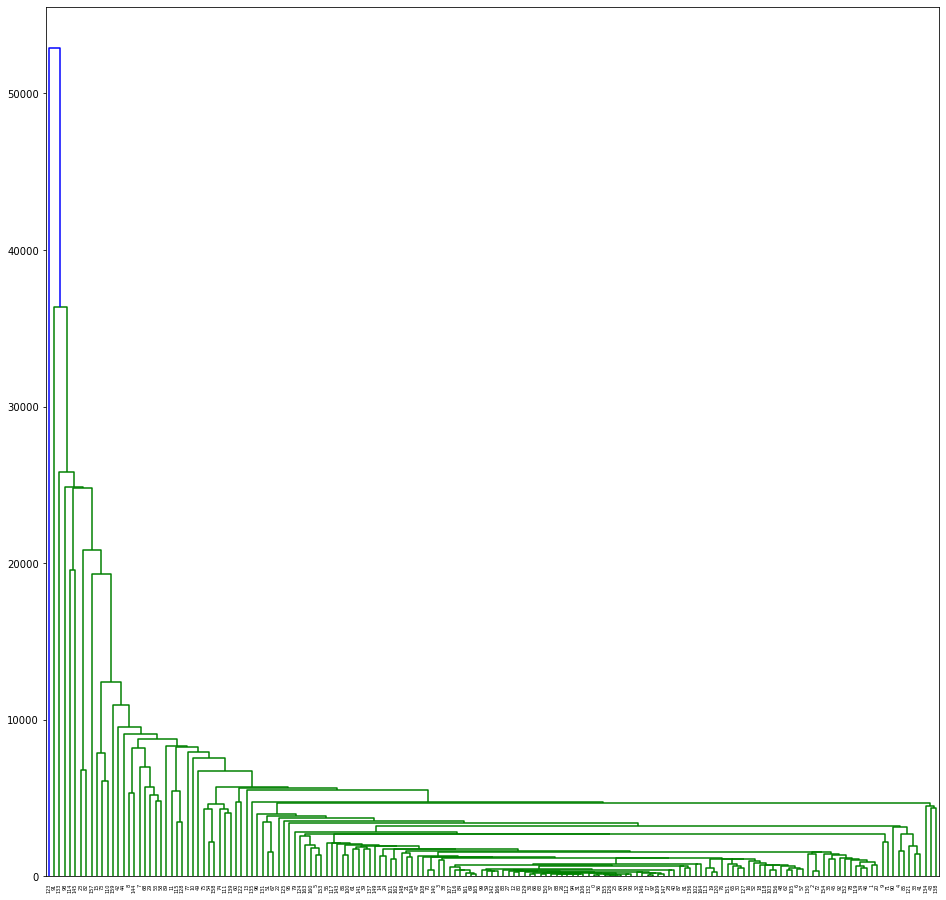

In [67]:
# Single Linkage is the distance between 2 clusters which is the shortest distance between points in the two clusters

plt.figure(figsize = (16,16))
mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)

plt.show()

# Complete Linkage

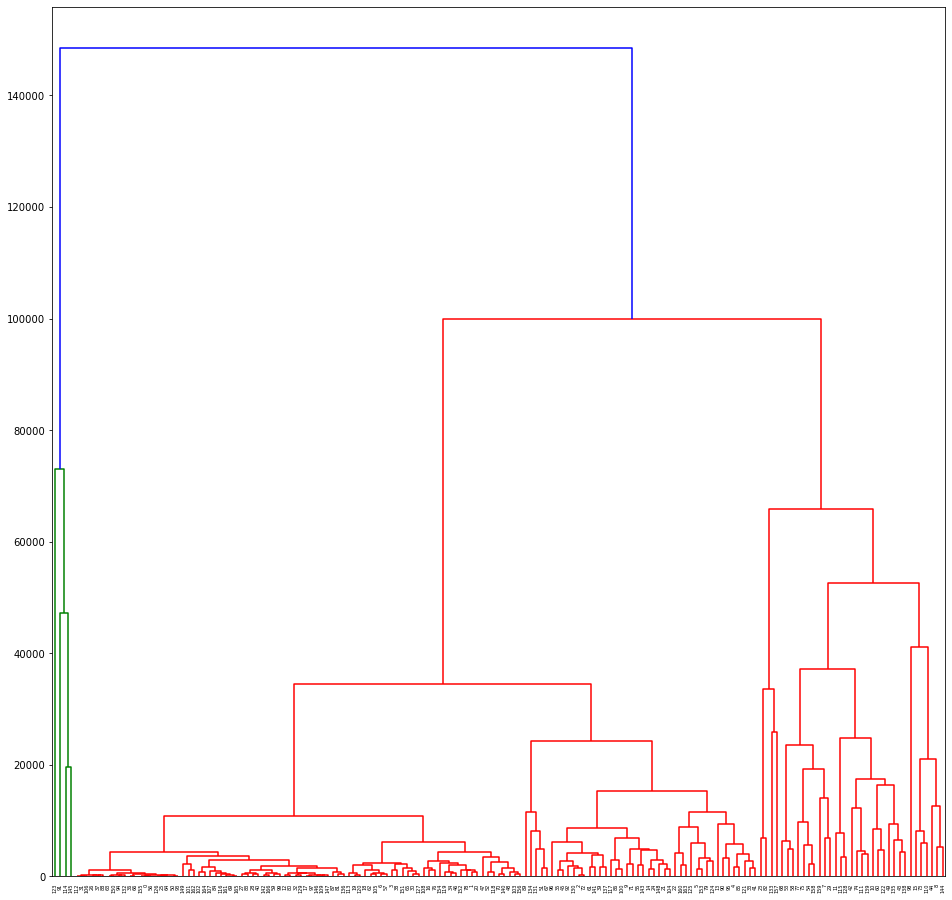

In [68]:
# Complete Linkage is the distance between 2 clusters which has the maximum distance between any 2 points in the clusters

plt.figure(figsize = (16, 16))
mergings = linkage(df, method= "complete", metric='euclidean')
dendrogram(mergings)

plt.show()

If we cut the dendrogram at 8000, we get 3 clusters.

In [69]:
# Now as we know, the best result is obtained when 3 clusters are taken:

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [70]:
# Adding cluster number to dataset:

df['cluster_labels'] = cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [71]:
# Adding country names with dataset:

hier_df = pd.concat([df, pd.Series(cluster_labels)], axis =1)
hier_df.columns=['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp','KM-ClusLabel','Hier_label']
hier_df['country']= df_km['country']
hier_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-ClusLabel,Hier_label,country
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,Algeria
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,Antigua and Barbuda


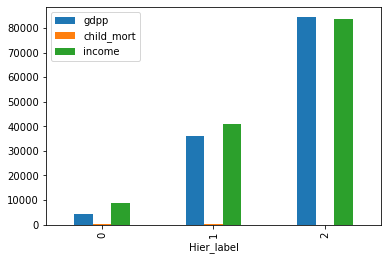

In [72]:
hier_df[['gdpp','child_mort','income', 'Hier_label']].groupby('Hier_label').mean().plot(kind = 'bar')

Here we can see cluster number 0 has minimum "gdpp" and "income", but "child_mortality rate" cant be said with this.

Text(0, 0.5, 'Child Mortality Rate')

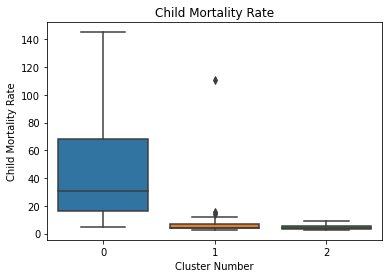

In [73]:
# Plotting for child mortality rate for better visualization and finalizing right cluster as per requirement:

sns.boxplot(x='Hier_label', y='child_mort', data=hier_df)
plt.title('Child Mortality Rate')
plt.xlabel('Cluster Number')
plt.ylabel('Child Mortality Rate')

From the above plot, it is clear that cluster number=0 has maximum child mortality rate too. So we have to choose from cluster =0

In [74]:
# Sorting countries from cluster 0 as per their need of aid.

hier_df[hier_df['Hier_label']==0].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM-ClusLabel,Hier_label,country
26,93.60,20.6052,26.7960,90.552,764,12.300,57.7,6.2600,231,0,0,Burundi
88,89.30,62.4570,38.5860,302.802,700,5.470,60.8,5.0200,327,0,0,Liberia
37,116.00,137.2740,26.4194,165.664,609,20.800,57.5,6.4504,334,0,0,"Congo, Dem. Rep."
112,123.00,77.2560,17.9568,170.868,814,2.550,58.8,6.4504,348,0,0,Niger
132,145.16,67.0320,52.2690,137.655,1220,17.200,55.0,5.2000,399,0,0,Sierra Leone
...,...,...,...,...,...,...,...,...,...,...,...,...
163,17.10,3847.5000,662.8500,2376.000,16500,25.988,75.4,2.4700,13500,0,0,Venezuela
41,5.50,5076.0000,1047.6000,5143.500,20100,0.821,76.3,1.5500,13500,0,0,Croatia
51,4.50,10964.6000,880.3800,10030.200,22700,1.740,76.0,1.7200,14600,0,0,Estonia
13,14.20,6320.0000,1275.2000,7792.000,15300,0.321,76.7,1.7800,16000,0,0,Barbados


# Conclusion: 
## Top Ten countries, which need the help most are (by Hierarchical Method) are same as that found by KMeans clustering Method which are as below:
1- Burundi

2- Liberia

3- Congo, Dem. Rep.

4- Niger

5- Sierra Leone

6- Madagascar

7- Mozambique

8- Central African Republic

9- Malawi

10- Eritrea